In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
infile1 = "../..//raw_data/Seca Floresta/Pit 1/Seca_Floresta.csv" 
df = pd.read_csv(infile1, na_values='NAN', skiprows=15, parse_dates=[0], index_col=0) 


In [2]:
df=df.loc[df['Pit number'] == 1] 
df=df.drop(columns='Treatment')

In [3]:
df=df.drop(columns='Pit number')

In [4]:
df.mask(df<=-0.01, inplace=True)
df.columns=['Depth.cm', 'SoilMoisture.cm3cm3', 'CO2.percent', 'N2O.ppm']
df

,Depth.cm,SoilMoisture.cm3cm3,CO2.percent,N2O.ppm
Date,,,,
1999-12-09,10,NaN,0.74,0.70
1999-12-09,25,NaN,1.49,1.29
1999-12-09,30,0.337,NaN,NaN
1999-12-09,50,0.217,1.96,1.85
1999-12-09,100,0.212,1.96,0.54
...,...,...,...,...
2002-06-14,700,0.355,1.04,0.38
2002-06-14,800,0.353,NaN,NaN
2002-06-14,900,0.372,NaN,NaN


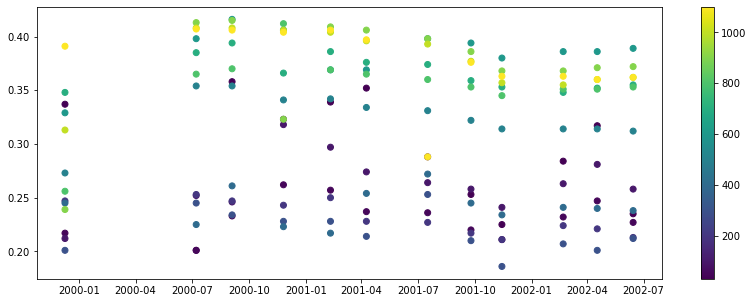

In [5]:
fig,ax=plt.subplots()
fig.set_size_inches(14,5)
im=ax.scatter(df.index, df['SoilMoisture.cm3cm3'], c=df['Depth.cm'])
cbar=fig.colorbar(im)

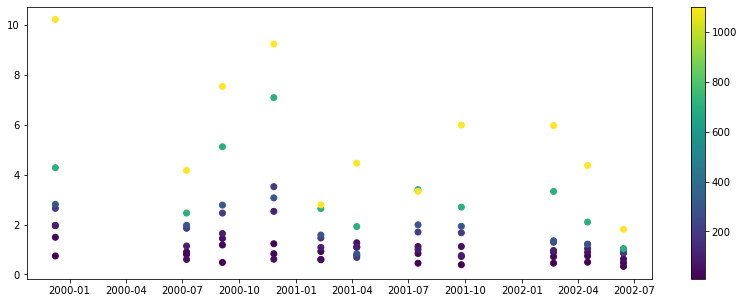

In [6]:
fig,ax=plt.subplots()
fig.set_size_inches(14,5)
im=ax.scatter(df.index, df['CO2.percent'], c=df['Depth.cm'])
cbar=fig.colorbar(im)

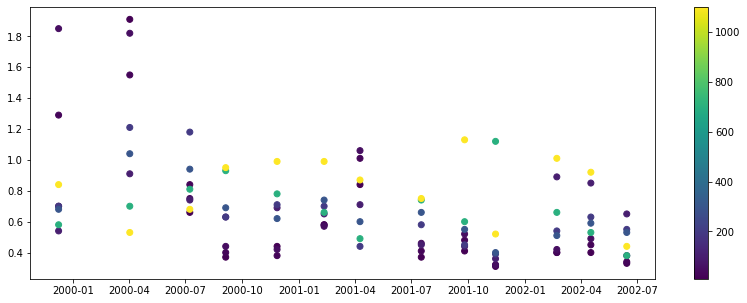

In [7]:
fig,ax=plt.subplots()
fig.set_size_inches(14,5)
im=ax.scatter(df.index, df['N2O.ppm'], c=df['Depth.cm'])
cbar=fig.colorbar(im)

In [8]:
output=df.copy()
today = dt.date.today()
outfile = '../../processed_data/Seca_Floresta/SFPit1_processed.csv'
output.to_csv(outfile, na_rep=-99999, index_label='DateTime.EST')